# West Coast Wave Energy Capacity Factors from Synthetic Wave Data

Importing Packages

In [27]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5pyd
import rex
import scipy
from scipy import interpolate
from scipy.interpolate import RegularGridInterpolator
import time

Importing power matrix

In [28]:
path='/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/RM6_Power_Matrix_SAM_CSV.csv'
p_matrix = pd.read_csv(path, index_col=0)

Importing location IDs from intersect of areas and NREL coordinates

In [29]:
path='/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/shape_files/NREL_points_intersect_areas/NREL_points_intersect_areas.csv'
intersect_loc_ids = pd.read_csv(path, index_col=0)
intersect_loc_ids = intersect_loc_ids.reset_index(drop=False)
intersect_loc_ids.drop(['Area','Area (m2)','aea (m^2)','area(km^2)'],inplace=True,axis=1)
intersect_loc_ids


,loc_id,lat,lon,id,area(sq.km
0,19699,48.4913,-125.183,1,1285.429
1,19700,48.4771,-125.194,1,1285.429
2,20957,48.4788,-125.173,1,1285.429
3,20958,48.4659,-125.178,1,1285.429
4,20959,48.4522,-125.181,1,1285.429
...,...,...,...,...,...
89181,662450,37.8497,-122.789,70,290.098
89182,663159,37.8562,-122.798,70,290.098
89183,663160,37.8549,-122.794,70,290.098
89184,663161,37.8538,-122.790,70,290.098


In [30]:
intersect_ids = intersect_loc_ids['loc_id'][::10]
intersect_ids

0         19699
10        22230
20        23512
30        23522
40        24813
          ...  
89140    659443
89150    660224
89160    660973
89170    661717
89180    662449
Name: loc_id, Length: 8919, dtype: int64

Defining lookup axes and rated power of power matrix

In [31]:
x = p_matrix.index.astype(float)
y = p_matrix.columns.astype(float)
z = p_matrix.values
rated_p = z.max()
xp, yp = np.meshgrid(x,y,sparse=True)

2D interpolation function for imported power matrix

In [32]:
l = RegularGridInterpolator((x, y), z, bounds_error=False)

Extending power matrix

In [33]:
max_Hs = 12.75
max_Te = 30.5
ext_x = np.arange(0, max_Hs, 0.25)
ext_y = np.arange(0, max_Te, 0.25)
xp, yp = np.meshgrid(ext_x,ext_y, sparse=True)
ext_z = l((xp,yp))
ext_p_matrix = pd.DataFrame(ext_z, index=ext_y, columns=ext_x)
ext_p_matrix = ext_p_matrix.T.fillna(method='ffill').fillna(method='bfill').fillna(0)

In [35]:
ext_p_matrix

,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,...,28.00,28.25,28.50,28.75,29.00,29.25,29.50,29.75,30.00,30.25
0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
p_matrix

,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,...,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5
Hs/Te,,,,,,,,,,,,,,,,,,,,,
0.25,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0.75,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2,0.2,0.2,0.2,0.1,0.1,0.0,0
1.25,0,0,0,0,0.0,0.0,0.0,0.0,4.3,14.7,...,21.3,18.8,16.2,13.0,10.1,7.6,5.7,4.2,3.1,0
1.75,0,0,0,0,0.0,0.0,0.2,35.2,68.4,75.1,...,64.1,55.3,46.6,38.3,30.8,24.1,18.9,14.8,11.6,0
2.25,0,0,0,0,0.0,0.1,26.6,128.3,145.6,142.0,...,120.0,106.1,91.4,76.1,61.2,48.8,39.2,31.4,25.1,0
2.75,0,0,0,0,1.6,0.6,121.3,215.7,229.0,219.9,...,182.0,159.3,137.2,117.0,98.4,81.5,65.3,52.4,42.0,0
3.25,0,0,0,0,19.8,36.5,212.4,288.1,321.7,305.0,...,250.2,220.9,188.3,159.8,133.6,110.3,93.2,77.3,64.1,0
3.75,0,0,0,0,46.3,120.2,212.4,288.1,338.7,350.5,...,319.8,278.8,237.8,202.8,170.4,140.7,119.9,101.5,86.0,0
4.25,0,0,0,0,84.7,142.3,212.4,288.1,338.7,350.5,...,350.3,337.8,284.8,233.4,186.4,149.2,129.5,112.8,98.3,0


Text(0, 0.5, '$H_s\\: (m)$')

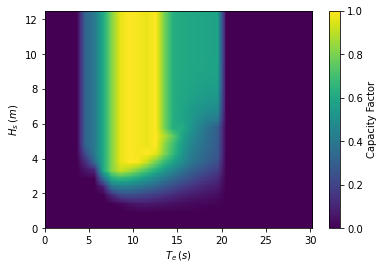

In [37]:
plt.imshow(ext_p_matrix/rated_p, aspect = 'auto', origin='lower', extent=[min(ext_y),max(ext_y),min(ext_x),max(ext_x)])
plt.colorbar(label='Capacity Factor')
plt.xlabel('$T_e\: (s)$')
plt.ylabel('$H_s\: (m)$')


2D interpolation function for extended power matrix

In [38]:
look = RegularGridInterpolator((ext_x, ext_y), ext_p_matrix.values, bounds_error=False)

Importing wave data from NREL API and calculating capacity factors

In [45]:
y = 2006

variables = ['significant_wave_height', 'peak_period']
pathAPI = '/nrel/US_wave/West_Coast/West_Coast_wave_2006.h5'
df_list = []
# to do: Replace with for loop over coordindates goes here
for idx in intersect_ids:
    with h5pyd.File(pathAPI, mode='r') as f:
        # Extract time_index and convert to datetime
        time_index = pd.to_datetime(f['time_index'][...].astype(str))
        # Initialize DataFrame to store time-series data
        time_series = pd.DataFrame(index=[time_index])
        # Extract wave height, direction, and period
        new_cols = []
        for var in variables:
            # Get dataset
            ds = f[var]
            # Extract site 100 and add to DataFrame
            if len(ds) == 0:
                continue
            print(idx)
            time_series[var] = ds[:, idx]
            new_name = var + '_' + ds.attrs['units']
            new_cols.append(new_name)
    time_series.columns = new_cols
    time_series.loc[:, 'capacity_factor'] = time_series.apply(lambda x: look((x['significant_wave_height_m'],x['peak_period_s']))/rated_p,axis=1)
    time_series.loc[:, 'loc_id'] = idx
    df_list.append(time_series)
    time.sleep(2)
df = pd.concat(df_list, ignore_index=False)
wave_data = df
#output_path='/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/wave_data_syn_2006.csv'
#wave_data.to_csv(output_path,index=True)


19699
19699
22230
22230
23512
23512
23522
23522
24813
24813
26111
26111
26121
26121
27276
27276
27430
27430
27440
27440
28595
28595
28757
28757
28767
28767
29922
29922
29932
29932
30101
30101
30111
30111
30121
30121
31272
31272
31282
31282
31459
31459
31469
31469
31479
31479
31489
31489
32640
32640
32650
32650
32831
32831
32841
32841
32851
32851
32861
32861
34010
34010
34020
34020
34030
34030
34219
34219
34229
34229
34239
34239
34249
34249
34259
34259
35408
35408
35418
35418
35611
35611
35621
35621
35631
35631
35641
35641
35651
35651
35661
35661
36808
36808
36818
36818
36828
36828
37024
37024
37034
37034
37044
37044
37054
37054
37064
37064
37074
37074
37084
37084
38235
38235
38245
38245
38255
38255
38451
38451
38461
38461
38471
38471
38481
38481
38491
38491
38501
38501
38511
38511
39662
39662
39672
39672
39682
39682
39692
39692
39892
39892
39902
39902
39912
39912
39922
39922
39932
39932
39942
39942
39952
39952
39962
39962
41112
41112
41122
41122
41132
41132
41142
41142
41152
41152
4135

42841
42841
42851
42851
42861
42861
42871
42871
42881
42881
42891
42891
42901
42901
44052
44052
44062
44062
44072
44072
44082
44082
44092
44092
44102
44102
44303
44303
44313
44313
44323
44323
44333
44333
44343
44343
44353
44353
44363
44363
44373
44373
44383
44383
44393
44393
45545
45545
45555
45555
45565
45565
45575
45575
45585
45585
45595
45595
45795
45795
45805
45805
45815
45815
45825
45825
45835
45835
45845
45845
45855
45855
45865
45865
45875
45875
45885
45885
45895
45895
47048
47048
47058
47058
47068
47068
47078
47078
47088
47088
47098
47098
47108
47108
47309
47309
47319
47319
47329
47329
47339
47339
47349
47349
47359
47359
47369
47369
47379
47379
47389
47389
47399
47399
47409
47409
48564
48564
48574
48574
48584
48584
48594
48594
48604
48604
48614
48614
48624
48624
48634
48634
48835
48835
48845
48845
48855
48855
48865
48865
48875
48875
48885
48885
48895
48895
48905
48905
48915
48915
48925
48925
48935
48935
48945
48945
50101
50101
50111
50111
50121
50121
50131
50131
50141
50141
5015

84714
84724
84724
84734
84734
84744
84744
84754
84754
84998
84998
85008
85008
85018
85018
85028
85028
85038
85038
86388
86388
86398
86398
86408
86408
86418
86418
86428
86428
86438
86438
86448
86448
86458
86458
86468
86468
86478
86478
86488
86488
86731
86731
86741
86741
86751
86751
86761
86761
86771
86771
86781
86781
88144
88144
88154
88154
88164
88164
88174
88174
88184
88184
88194
88194
88204
88204
88214
88214
88224
88224
88234
88234
88475
88475
88485
88485
88495
88495
88505
88505
88515
88515
88525
88525
89902
89902
89912
89912
89922
89922
89932
89932
89942
89942
89952
89952
89962
89962
89972
89972
89982
89982
89992
89992
90231
90231
90241
90241
90251
90251
90261
90261
90271
90271
91660
91660
91670
91670
91680
91680
91690
91690
91700
91700
91710
91710
91720
91720
91730
91730
91740
91740
91750
91750
91988
91988
91998
91998
92008
92008
92018
92018
92028
92028
92038
92038
93442
93442
93452
93452
93462
93462
93472
93472
93482
93482
93492
93492
93502
93502
93512
93512
93522
93522
93759
9375

126462
126472
126472
126626
126626
126636
126636
126646
126646
126656
126656
126870
126870
126880
126880
126890
126890
128361
128361
128371
128371
128528
128528
128538
128538
128548
128548
128558
128558
128773
128773
128783
128783
128793
128793
130269
130269
130279
130279
130432
130432
130442
130442
130452
130452
130462
130462
130667
130667
130677
130677
130687
130687
130697
130697
132187
132187
132339
132339
132349
132349
132359
132359
132369
132369
132539
132539
132549
132549
132584
132584
132594
132594
132604
132604
132614
132614
134108
134108
134258
134258
134268
134268
134278
134278
134288
134288
134448
134448
134458
134458
134494
134494
134504
134504
134514
134514
134524
134524
136024
136024
136172
136172
136182
136182
136192
136192
136202
136202
136353
136353
136363
136363
136373
136373
136409
136409
136419
136419
136429
136429
136439
136439
136449
136449
137957
137957
138098
138098
138108
138108
138118
138118
138267
138267
138277
138277
138287
138287
138297
138297
138334
138334

ValueError: cannot reshape array of size 0 into shape (2920,)

In [ ]:
wave_data

,significant_wave_height_m,peak_period_s,capacity_factor,loc_id
2006-01-01 00:00:00+00:00,3.33361,12.1150,0.692199,19699
2006-01-01 03:00:00+00:00,3.41603,12.1150,0.721548,19699
2006-01-01 06:00:00+00:00,3.46285,12.1150,0.738220,19699
2006-01-01 09:00:00+00:00,3.49466,12.1150,0.749547,19699
2006-01-01 12:00:00+00:00,3.57118,12.1150,0.776795,19699
...,...,...,...,...
2006-12-31 09:00:00+00:00,3.43860,13.3268,0.608178,74616
2006-12-31 12:00:00+00:00,3.25055,13.3268,0.553502,74616
2006-12-31 15:00:00+00:00,3.05451,13.3268,0.494312,74616
2006-12-31 18:00:00+00:00,2.81156,13.3268,0.420950,74616


In [34]:
df

,loc_id,significant_wave_height_m,peak_period_s,capacity_factor
0,312809,3.40128,13.326800,0.597327
1,312809,3.53424,13.326800,0.635986
2,312809,3.77443,13.326800,0.705561
3,312809,3.80797,13.326800,0.714954
4,312809,3.85934,13.326800,0.729340
...,...,...,...,...
858475,347193,3.94249,16.125999,0.445535
858476,347193,3.84103,16.125999,0.438990
858477,347193,3.68984,14.659700,0.549418
858478,347193,3.53206,14.659700,0.511596


In [11]:
output_path='/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/wave_data_syn_2006.csv'
wave_data.to_csv(output_path,index=True)

In [14]:
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/wave_time_series/wave_data_syn_2006.csv'
wave_data_2006 = pd.read_csv(path, index_col='time')
wave_data_2006

,significant_wave_height_m,peak_period_s,capacity_factor,loc_id
time,,,,
2006-01-01 00:00:00+00:00,3.40128,13.3268,0.597327,312809
2006-01-01 03:00:00+00:00,3.53424,13.3268,0.635986,312809
2006-01-01 06:00:00+00:00,3.77443,13.3268,0.705561,312809
2006-01-01 09:00:00+00:00,3.80797,13.3268,0.714954,312809
2006-01-01 12:00:00+00:00,3.85934,13.3268,0.729340,312809
...,...,...,...,...
2006-12-31 09:00:00+00:00,3.94249,16.1260,0.445535,347193
2006-12-31 12:00:00+00:00,3.84103,16.1260,0.438990,347193
2006-12-31 15:00:00+00:00,3.68984,14.6597,0.549418,347193


In [16]:
first_col = wave_data_2006.pop('loc_id')
wave_data_2006.insert(0,'loc_id',first_col)
wave_data_2006

,loc_id,significant_wave_height_m,peak_period_s,capacity_factor
time,,,,
2006-01-01 00:00:00+00:00,312809,3.40128,13.3268,0.597327
2006-01-01 03:00:00+00:00,312809,3.53424,13.3268,0.635986
2006-01-01 06:00:00+00:00,312809,3.77443,13.3268,0.705561
2006-01-01 09:00:00+00:00,312809,3.80797,13.3268,0.714954
2006-01-01 12:00:00+00:00,312809,3.85934,13.3268,0.729340
...,...,...,...,...
2006-12-31 09:00:00+00:00,347193,3.94249,16.1260,0.445535
2006-12-31 12:00:00+00:00,347193,3.84103,16.1260,0.438990
2006-12-31 15:00:00+00:00,347193,3.68984,14.6597,0.549418


Merging lat and lon coordinates with buoy ID's

In [17]:
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/syn_buoy_coordinates.csv'
coordinates = pd.read_csv(path, index_col=None)
coordinates

,loc_id,lat,lon
0,0,48.8641,-125.386
1,1,48.8418,-125.446
2,2,48.8193,-125.504
3,3,48.7972,-125.563
4,4,48.7740,-125.622
...,...,...,...
699899,699899,37.4632,-122.027
699900,699900,37.4617,-122.027
699901,699901,37.4631,-122.026
699902,699902,37.4615,-122.026


In [ ]:
#path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/wave_time_series/wave_data_syn_2006.csv'
#wave_data_2006 = pd.read_csv(path, index_col='time')
#wave_data_2006

In [18]:
wave_data_2006 = wave_data_2006.reset_index()
wave_data_2006 = pd.merge(wave_data_2006, coordinates, on='loc_id').set_index('time')
third_col = wave_data_2006.pop('lat')
wave_data_2006.insert(1,'lat',third_col)
fourth_col = wave_data_2006.pop('lon')
wave_data_2006.insert(2,'lon',fourth_col)
wave_data_2006

,loc_id,lat,lon,significant_wave_height_m,peak_period_s,capacity_factor
time,,,,,,
2006-01-01 00:00:00+00:00,312809,35.6043,-122.029,3.40128,13.3268,0.597327
2006-01-01 03:00:00+00:00,312809,35.6043,-122.029,3.53424,13.3268,0.635986
2006-01-01 06:00:00+00:00,312809,35.6043,-122.029,3.77443,13.3268,0.705561
2006-01-01 09:00:00+00:00,312809,35.6043,-122.029,3.80797,13.3268,0.714954
2006-01-01 12:00:00+00:00,312809,35.6043,-122.029,3.85934,13.3268,0.729340
...,...,...,...,...,...,...
2006-12-31 09:00:00+00:00,347193,35.4567,-121.525,3.94249,16.1260,0.445535
2006-12-31 12:00:00+00:00,347193,35.4567,-121.525,3.84103,16.1260,0.438990
2006-12-31 15:00:00+00:00,347193,35.4567,-121.525,3.68984,14.6597,0.549418


In [19]:
output_path='/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/wave_time_series/wave_data_syn_2006.csv'
wave_data_2006.to_csv(output_path,index=True)